In [87]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [88]:
def get_file_list(folder_path):
    
    temp_list = os.listdir(folder_path)
    final_list = []
    for file in temp_list:
        temp = file.split('.')[-1]
        if temp == 'jpg' or temp == 'JPG'or temp == 'png':
            final_list.append(file)
            
    return final_list


def load_img(file_path):
    img = cv2.imread(file_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    return img

def plot_img(img, cmap=None):
    f, ax = plt.subplots(1, 1, figsize = (15, 10))
    if cmap is None:
        ax.imshow(img)
    else:
        ax.imshow(img, cmap)
        
def plot_two_img(img1, img2):
    f, ax = plt.subplots(1, 2, figsize = (15, 7))
    ax[0].imshow(img1)
    ax[1].imshow(img2)

In [89]:
def preprocess(img, threshold=50):
    diff = img[:,:,0].astype(np.int16) - img[:,:,1].astype(np.int16)
    diff = remove_outliers(diff)
    diff[diff < threshold] = 0
    d = (diff.astype(np.float16) - diff.min()) / (diff.max() - diff.min()) * 255
    res = img.copy()
    res[:,:,0] = d.astype(np.uint8)
    
    return res

def green_c_pp(img, threshold=10):
    diff = img[:,:,0].astype(np.int16) - img[:,:,1].astype(np.int16)
    diff = remove_outliers(diff)
    diff[diff > threshold] = 0
    d = (diff.astype(np.float16) - diff.min()) / (diff.max() - diff.min()) * 255
    res = img.copy()
    res[:,:,0] = d.astype(np.uint8)
    
    return res

def remove_outliers(diff, lower_percentile = 0.05, upper_percentile = 0.0005):
    
    h, b = np.histogram(diff.flatten(), 256)
    total = np.sum(h)
    accumulated = np.cumsum(h).astype(np.float32) / total
    
    for i, h_ in enumerate(accumulated):
        if h_ >= lower_percentile:
            break
    lower_threshold = b[i]
    
    for i in range(len(accumulated) - 1, 0, -1):
        if accumulated[i] <= 1 - upper_percentile:
            break
    upper_threshold = b[i]
    
    res = diff.copy()
    res[res >= upper_threshold] = 0
    res[res <= lower_threshold] = 0
    
    return res

def calculate_2dft(input):
    ft = np.fft.ifftshift(input)
    ft = np.fft.fft2(ft)
    return np.fft.fftshift(ft)
        
        

In [90]:
folder_path = r'C:\Users\Matan\Documents\Projects\Data\JAI preprocess'
file_list = get_file_list(folder_path)
len(file_list)

56

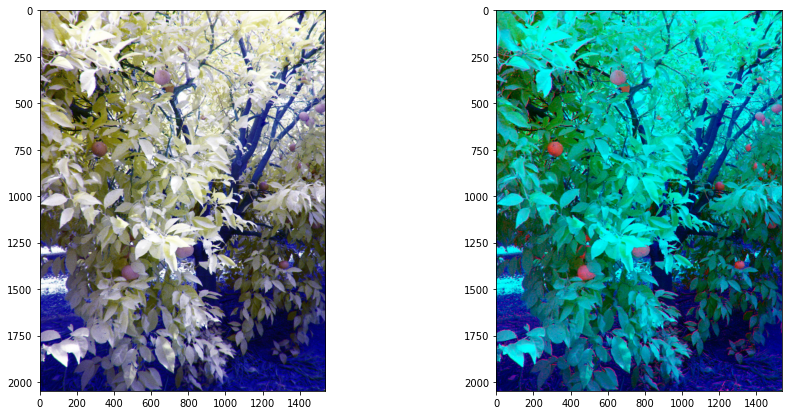

In [100]:
#for file in file_list:
file = file_list[6]
img = load_img(os.path.join(folder_path, file))
res = preprocess(img, 5)
plot_two_img(img, res)

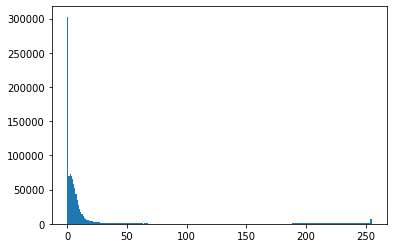

In [30]:
h = plt.hist(img[:,:,2].flatten(), 256) 

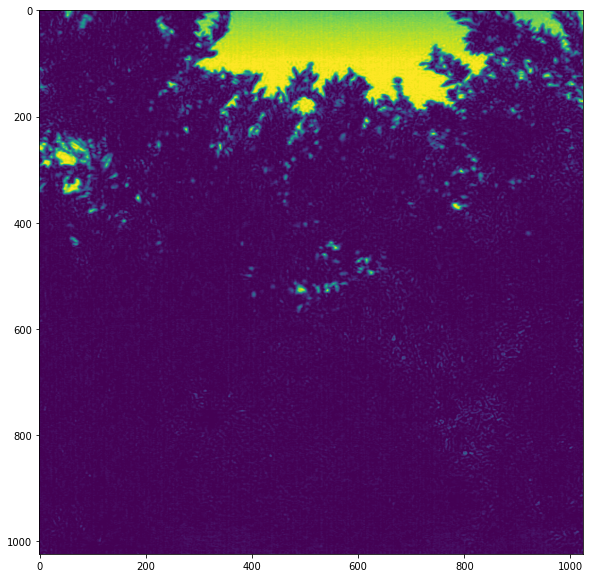

In [31]:
plot_img(img[:,:,2])

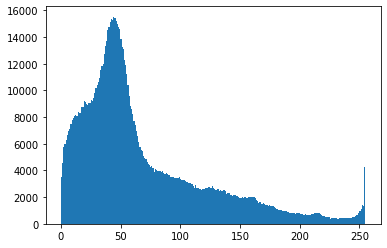

In [33]:
h = plt.hist(img[:,:,1].flatten(), 256)

In [105]:
threshold = 10
diff = img[:,:,0].astype(np.int16) - img[:,:,1].astype(np.int16)
diff = remove_outliers(diff)
diff_min = diff.min()

b = img[:,:,2].copy()

#find sky pixels
TF = np.where(b > 100, True, False)
diff[TF] = diff_min

tf1 = np.where(diff < threshold, True, False)
#tf2 = np.where(diff > -threshold, True, False)
#tf = tf1 & tf2
diff[tf1] = diff_min

#noise_thr = 35
#diff[diff > noise_thr ] = 0 
d = (diff.astype(np.float16) - diff.min()) / (diff.max() - diff.min()) * 255
res = img.copy()
res[:,:,0] = d.astype(np.uint8)

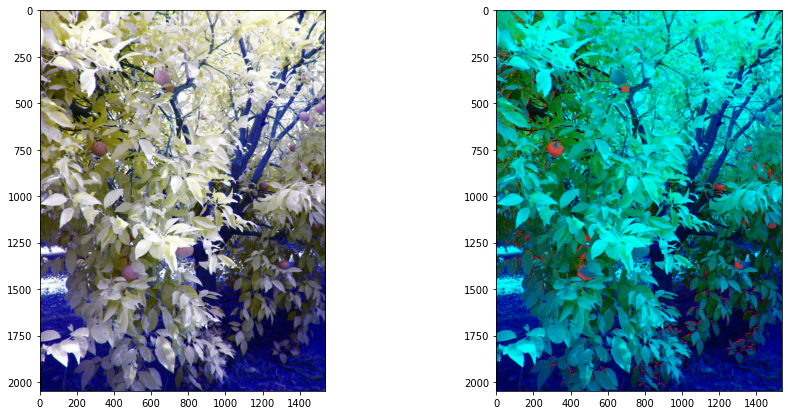

In [108]:
plot_two_img(img, res)

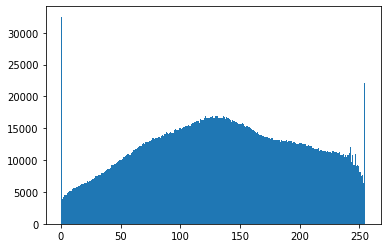

In [109]:
#diff = img[:,:,0].astype(np.int16) - img[:,:,1].astype(np.int16)
#diff = remove_outliers(diff)
h = plt.hist(b.flatten(), 256)

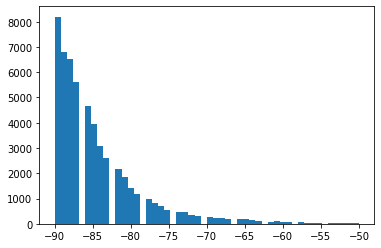

In [73]:
from scipy.stats import halfnorm
vec = diff[diff > -10].flatten()


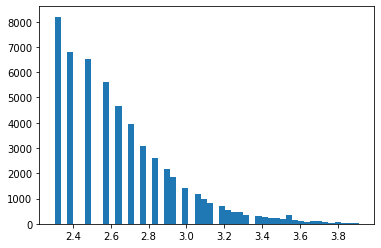

In [74]:
ld = np.log(diff[diff>-10].flatten())
h = plt.hist(ld, 50)

In [50]:
m = diff.mean()
s = diff.std()

s

12.187874423770849

In [51]:
m

-0.7288074493408203

In [44]:
r = img[:,:,0].copy()

In [45]:
g = img[:,:,1].copy()

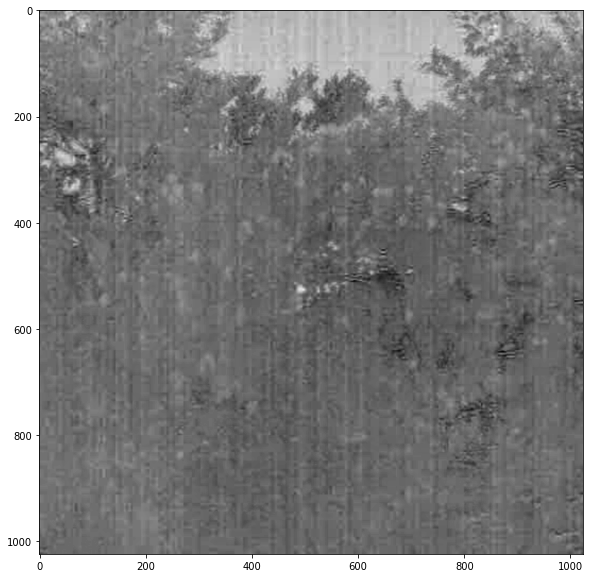

In [57]:
d = r.astype(np.float16) - g.astype(np.float16)
plot_img(d, 'gray')

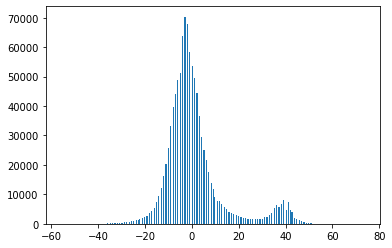

In [47]:
h = plt.hist(d.flatten(), 256)

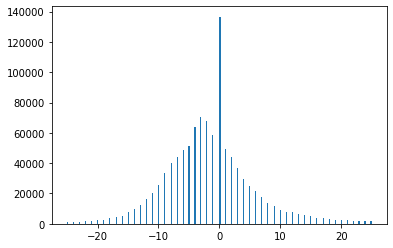

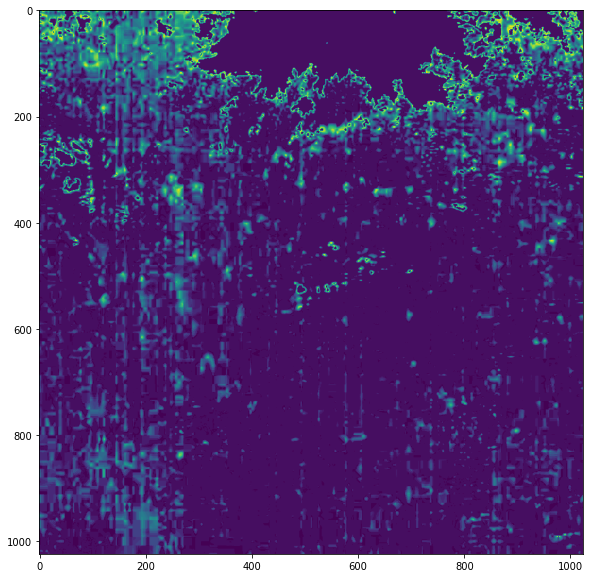

In [61]:
tf1 = d > 25
tf2 = d < -25
tf = np.logical_or(tf1, tf2)
d[tf] = 0
flatten = d[np.logical_not(tf)].flatten()
h = plt.hist(flatten,256)
m = np.mean(flatten)
s = np.std(flatten)
t = d.copy()
t[d < m] = 0
t = (t.astype(np.float16) - t.min()) / (t.max() - t.min()) * 255
plot_img(t)

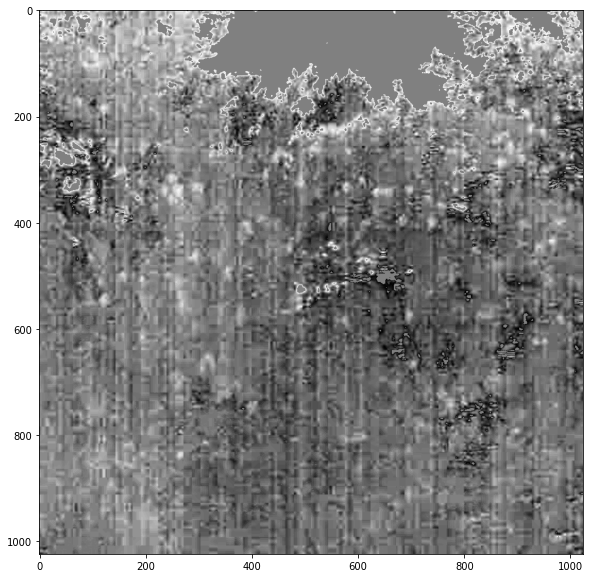

In [60]:
plot_img(d, 'gray')

In [18]:
res = img.copy()

In [19]:
d = (d.astype(np.float16) - d.min()) / (d.max() - d.min()) * 255

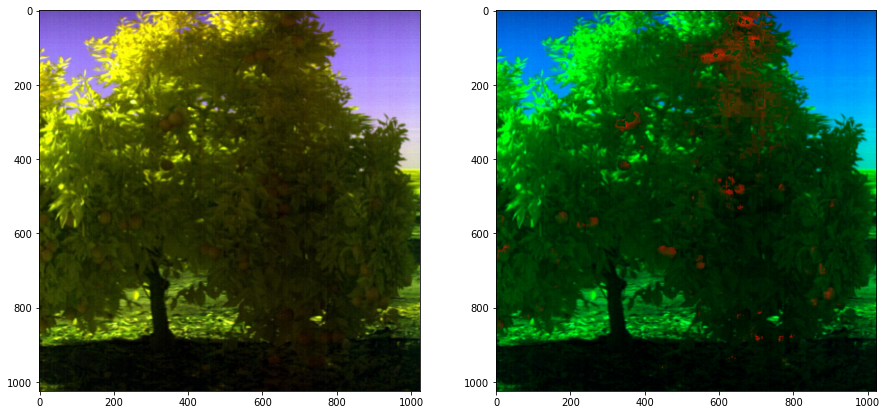

In [20]:
res[:,:,0] = d.copy()
plot_two_img(img, res)